<a href="https://colab.research.google.com/github/YanggWendy/FYP-Portfolio-Management-System/blob/main/FYP_1993_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'FYP Data/'
assert FOLDERNAME is not None, "[1]Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
!pip install yfinance
!pip install fundamentalanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
PATH = '/content/drive/My Drive/FYP Data/' 

In [ ]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
import statistics
import fundamentalanalysis as fa
import datetime
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import load_model
import math
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network
from keras.optimizers import SGD

# Get Ticker

In [ ]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table[0]
SP500_ticker = data_table[0]['Symbol'].tolist()

#remove invalid stock ticker
SP500_ticker.remove('BRK.B')
SP500_ticker.remove('BF.B')
SP500_ticker.remove('GEHC')
#SP500_ticker.remove('BG')
#SP500_ticker.remove('FICO')
#SP500_ticker.remove('PODD')
len(SP500_ticker)

500

In [ ]:
#data = yf.download(SP500_ticker, period='max', interval="1d", group_by='tickers')

[*********************100%***********************]  500 of 500 completed


# Get Technical list & Fundamental data list

In [ ]:
Technical_list = ['Close','Volume','VEMA12','VSTD20','V20','AR','BR','AU','AD']
fundamental_list = ['marketCap', 'peRatio', 'pbRatio', 'evToSales','receivablesTurnover', 'payablesTurnover','debtToAssets', 'inventoryTurnover',
 'roe','revenuePerShare','cashPerShare']

#Get Technical data 

In [ ]:
stock_data = pd.read_csv(("drive/My Drive/FYP Data/price.csv"),index_col = [0], header = [0,1])
stock_data

ALGN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-01-31  265.260010  269.779999  265.000000  269.730011  269.730011   
2023-01-30  263.500000  268.549988  261.500000  265.820007  265.820007   
2023-01-27  260.000000  270.000000  259.019989  269.200012  269.200012   
2023-01-26  255.860001  263.100006  254.990005  262.950012  262.950012   
2023-01-25  246.820007  252.470001  245.639999  252.080002  252.080002   
...                ...         ...         ...         ...         ...   
1993-02-04         NaN         NaN         NaN         NaN         NaN   
1993-02-03         NaN         NaN         NaN         NaN         NaN   
1993-02-02         NaN         NaN         NaN         NaN         NaN   
1993-02-01         NaN         NaN         NaN         NaN         NaN   
1993-01-29         NaN         NaN         NaN         NaN         NaN   

                             SBAC                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2023-01-31   844700.0  291.950012  297.730011  289.690002  297.529999  ...   
2023-01-30  1454300.0  288.920013  295.019989  287.100006  290.200012  ...   
2023-01-27  1165100.0  289.190002  291.970001  286.890015  289.029999  ...   
2023-01-26  1177000.0  292.429993  294.559998  288.970001  291.079987  ...   
2023-01-25   820700.0  289.140015  292.380005  286.160004  291.649994  ...   
...               ...         ...         ...         ...         ...  ...   
1993-02-04        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-03        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-02        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-01        NaN         NaN         NaN         NaN         NaN  ...   
1993-01-29        NaN         NaN         NaN         NaN         NaN  ...   

                   XOM                                           DD  \
                   Low       Close   Adj Close    Volume       Open   
Date                                                                  
2023-01-31  110.430000  116.010002  115.124138  27861800  72.910004   
2023-01-30  113.150002  113.559998  112.692841  18672100  73.099998   
2023-01-27  115.389999  115.610001  114.727188  15179200  73.059998   
2023-01-26  114.339996  117.760002  116.860771  21019700  73.169998   
2023-01-25  111.389999  113.209999  112.345512  11914700  73.790001   
...                ...         ...         ...       ...        ...   
1993-02-04   15.375000   15.500000    5.945010   4631600  25.559553   
1993-02-03   15.406250   15.625000    5.923919   5699600  25.737461   
1993-02-02   15.343750   15.562500    5.900226   3359600  25.263039   
1993-02-01   15.281250   15.375000    5.829138   3186400  25.322342   
1993-01-29   15.156250   15.281250    5.793594   4369600  24.670010   

                                                                   
                 High        Low      Close  Adj Close     Volume  
Date                                                               
2023-01-31  74.000000  72.269997  73.949997  73.584908  2736000.0  
2023-01-30  73.559998  72.449997  72.650002  72.291336  2542000.0  
2023-01-27  74.190002  73.059998  73.550003  73.186890  2171300.0  
2023-01-26  73.790001  72.099998  73.730003  73.366005  3134500.0  
2023-01-25  74.180000  72.980003  73.529999  73.166985  3193100.0  
...               ...        ...        ...        ...        ...  
1993-02-04  26.211885  25.559553  26.033976   9.430413  1581710.0  
1993-02-03  25.915371  25.381643  25.500250   9.237073  1414770.0  
1993-02-02  25.737461  25.263039  25.678158   9.301520   895825.0  
1993-02-01  25.440947  25.085129  25.322342   9.172627   943461.0  
1993-01-2

In [ ]:
#stock_data = data.reindex(index=data.index[::-1])
#stock_data = stock_data['1993-01-29':'2023-01-31']
#stock_data

ALGN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-01-31  265.260010  269.779999  265.000000  269.730011  269.730011   
2023-01-30  263.500000  268.549988  261.500000  265.820007  265.820007   
2023-01-27  260.000000  270.000000  259.019989  269.200012  269.200012   
2023-01-26  255.860001  263.100006  254.990005  262.950012  262.950012   
2023-01-25  246.820007  252.470001  245.639999  252.080002  252.080002   
...                ...         ...         ...         ...         ...   
1993-02-04         NaN         NaN         NaN         NaN         NaN   
1993-02-03         NaN         NaN         NaN         NaN         NaN   
1993-02-02         NaN         NaN         NaN         NaN         NaN   
1993-02-01         NaN         NaN         NaN         NaN         NaN   
1993-01-29         NaN         NaN         NaN         NaN         NaN   

                             SBAC                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2023-01-31   844700.0  291.950012  297.730011  289.690002  297.529999  ...   
2023-01-30  1454300.0  288.920013  295.019989  287.100006  290.200012  ...   
2023-01-27  1165100.0  289.190002  291.970001  286.890015  289.029999  ...   
2023-01-26  1177000.0  292.429993  294.559998  288.970001  291.079987  ...   
2023-01-25   820700.0  289.140015  292.380005  286.160004  291.649994  ...   
...               ...         ...         ...         ...         ...  ...   
1993-02-04        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-03        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-02        NaN         NaN         NaN         NaN         NaN  ...   
1993-02-01        NaN         NaN         NaN         NaN         NaN  ...   
1993-01-29        NaN         NaN         NaN         NaN         NaN  ...   

                   XOM                                           DD  \
                   Low       Close   Adj Close    Volume       Open   
Date                                                                  
2023-01-31  110.430000  116.010002  115.124138  27861800  72.910004   
2023-01-30  113.150002  113.559998  112.692841  18672100  73.099998   
2023-01-27  115.389999  115.610001  114.727188  15179200  73.059998   
2023-01-26  114.339996  117.760002  116.860771  21019700  73.169998   
2023-01-25  111.389999  113.209999  112.345512  11914700  73.790001   
...                ...         ...         ...       ...        ...   
1993-02-04   15.375000   15.500000    5.945010   4631600  25.559553   
1993-02-03   15.406250   15.625000    5.923919   5699600  25.737461   
1993-02-02   15.343750   15.562500    5.900226   3359600  25.263039   
1993-02-01   15.281250   15.375000    5.829138   3186400  25.322342   
1993-01-29   15.156250   15.281250    5.793594   4369600  24.670010   

                                                                   
                 High        Low      Close  Adj Close     Volume  
Date                                                               
2023-01-31  74.000000  72.269997  73.949997  73.584908  2736000.0  
2023-01-30  73.559998  72.449997  72.650002  72.291336  2542000.0  
2023-01-27  74.190002  73.059998  73.550003  73.186890  2171300.0  
2023-01-26  73.790001  72.099998  73.730003  73.366005  3134500.0  
2023-01-25  74.180000  72.980003  73.529999  73.166985  3193100.0  
...               ...        ...        ...        ...        ...  
1993-02-04  26.211885  25.559553  26.033976   9.430413  1581710.0  
1993-02-03  25.915371  25.381643  25.500250   9.237073  1414770.0  
1993-02-02  25.737461  25.263039  25.678158   9.301520   895825.0  
1993-02-01  25.440947  25.085129  25.322342   9.172627   943461.0  
1993-01-2

In [ ]:
#stock_data.to_csv("drive/My Drive/FYP Data/price.csv",index=True)

##12 day Volumn MA

In [ ]:
for ticker in tqdm(SP500_ticker):
  #VEMA12
  stock_data_test = stock_data
  stock_TV = stock_data_test[ticker]['Volume'].tolist()

  counter = 0
  TV_MA12 = 0
  TV_MA12_stock_TV = []
  for i in range(len(stock_TV)):
    if len(stock_TV) - i >= 12:
      for j in range(12):
        TV_MA12 += stock_TV[i+j]

      TV_MA12_stock_TV.append(TV_MA12/12)
      TV_MA12 = 0
  while len(TV_MA12_stock_TV) != len(stock_TV):
    TV_MA12_stock_TV.append(0)

  stock_data_test[ticker,"VEMA12"] = TV_MA12_stock_TV


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#VSTD20
for ticker in tqdm(SP500_ticker):
  stock_TV = stock_data[ticker]['Volume'].tolist()

  counter = 0
  VSTD20 = []
  VSTD20_stock_TV = []
  for i in range(len(stock_TV)):
    if len(stock_TV) - i >= 20:
      for j in range(20):
        VSTD20.append(stock_TV[i+j])

      VSTD20_stock_TV.append(statistics.stdev(VSTD20))
      VSTD20 = []
  #print(len(VSTD20_stock_TV))
  while len(VSTD20_stock_TV) != len(stock_TV):
    VSTD20_stock_TV.append(0)

  stock_data_test[ticker,"VSTD20"] = VSTD20_stock_TV


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#V20
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  V20 = []
  V20_temp = []
  V20_AR = []


  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 252:
        V20_AR.append((stock_Close[i] - stock_Close[i+ 251])/stock_Close[i+ 251])

  while len(V20_AR) != len(stock_Open):
    V20_AR.append(0)

  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 20:
      for j in range(20):
        V20_temp.append(V20_AR[i+j])
      V20.append(statistics.stdev(V20_temp))
      V20_temp = []
  while len(V20) != len(stock_Open):
    V20.append(0)
  stock_data_test[ticker,"V20"] = V20

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#AR
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AR = []
  AR_HOGap = []
  AR_OLGap = []

  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 26:
      for j in range(26):
        AR_HOGap.append(stock_High[i+j]-stock_Open[i+j])
        AR_OLGap.append(stock_Open[i+j]-stock_Low[i+j])
      if sum(AR_OLGap) == 0:
        break
      AR.append(sum(AR_HOGap)*100/sum(AR_OLGap))
      AR_HOGap = []
      AR_OLGap = []

  while len(AR) != len(stock_Open):
    AR.append(0)
  stock_data[ticker,"AR"] = AR

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#BR
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  BR = []
  BR_HCGap = []
  BR_CLGap = []

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 26:
      for j in range(26):
        BR_HCGap.append(stock_High[i+j]-stock_Close[i+j+1])
        BR_CLGap.append(stock_Close[i+j+1]-stock_Low[i+j])
      if sum(BR_CLGap) == 0:
        break
      BR.append(sum(BR_HCGap)/sum(BR_CLGap))
      BR_HCGap = []
      BR_CLGap = []

  while len(BR) != len(stock_Open):
    BR.append(0)
  stock_data[ticker,"BR"] = BR

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#AU Aroon up
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AU = []
  AU_period = 25
  AU_High = []
  AU_High_index = 0

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 25:
      for j in range(25):
        AU_High.append(stock_High[1+i+j])

      AU_High_index = AU_High.index(max(AU_High))
      AU.append((AU_period - AU_High_index)/AU_period)
      AU_High = []
      AU_High_index = 0

  while len(AU) != len(stock_Open):
    AU.append(0)
  stock_data[ticker,"AU"] = AU

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#AD Aroon down
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AD = []
  AD_period = 25
  AD_LOW = []
  AD_LOW_index = 0

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 25:
      for j in range(25):
        AD_LOW.append(stock_Low[1+i+j])

      AD_LOW_index = AD_LOW.index(min(AD_LOW))
      AD.append((AD_period - AD_LOW_index)/AD_period)
      AD_LOW = []
      AD_LOW_index = 0

  while len(AD) != len(stock_Open):
    AD.append(0)
  stock_data[ticker,"AD"] = AD

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#VOL10
stock_data['CTLT']

,Open,High,Low,Close,Adj Close,Volume,VEMA12,VSTD20,V20,AR,BR,AU,AD
Date,,,,,,,,,,,,,
2023-01-31,52.830002,53.590000,52.299999,53.549999,53.549999,1417200.0,2.369883e+06,798169.740818,0.054330,142.871857,1.369855,1.00,0.04
2023-01-30,52.730000,54.349998,52.570000,52.580002,52.580002,2865000.0,2.400900e+06,756075.712218,0.057559,133.398754,1.294543,1.00,0.08
2023-01-27,52.250000,54.119999,51.930000,53.650002,53.650002,1747700.0,2.433650e+06,783194.601935,0.058604,127.032179,1.312591,0.92,0.12
2023-01-26,50.939999,52.320000,50.709999,52.270000,52.270000,2810300.0,2.663633e+06,823387.128669,0.056930,115.170054,1.080009,0.96,0.04
2023-01-25,49.000000,50.189999,48.389999,50.160000,50.160000,1174300.0,2.660933e+06,866149.067196,0.054603,105.398954,0.900682,1.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-02-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1993-02-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1993-02-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00


In [ ]:
stock_data

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   
...               ...        ...        ...        ...        ...        ...   
1993-02-04        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-03        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-02        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.04  0.36   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.08  0.40   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.04  0.44   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.04  0.48   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.04  0.52   
...                ...         ...         ...         ...  ...   ...   ...   
1993-02-04         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-03         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-02         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-01         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2023-01-31  0.20  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30  0.24  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27  0.28  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26  0.32  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25  0.36  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...          ...   ...   ...   ...   ...   ...   ...   ...  
1993-02-04  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[7556 rows x 6500 columns]

In [ ]:
stock_data.to_csv("drive/My Drive/FYP Data/stock data.csv",index=True, header=True )

In [ ]:
stock_data = pd.read_csv("drive/My Drive/FYP Data/stock data.csv",index_col = 0,header = [0,1])
stock_data

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   
...               ...        ...        ...        ...        ...        ...   
1993-02-04        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-03        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-02        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.04  0.36   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.08  0.40   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.04  0.44   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.04  0.48   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.04  0.52   
...                ...         ...         ...         ...  ...   ...   ...   
1993-02-04         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-03         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-02         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-01         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2023-01-31  0.20  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30  0.24  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27  0.28  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26  0.32  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25  0.36  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...          ...   ...   ...   ...   ...   ...   ...   ...  
1993-02-04  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[7556 rows x 6500 columns]

In [ ]:
SP500 = pd.read_csv("drive/My Drive/FYP Data/stock data.csv",index_col = 0,header = [0,1])
SP500

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   
...               ...        ...        ...        ...        ...        ...   
1993-02-04        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-03        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-02        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.04  0.36   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.08  0.40   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.04  0.44   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.04  0.48   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.04  0.52   
...                ...         ...         ...         ...  ...   ...   ...   
1993-02-04         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-03         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-02         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-01         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
2023-01-31  0.20  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30  0.24  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27  0.28  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26  0.32  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25  0.36  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...          ...   ...   ...   ...   ...   ...   ...   ...  
1993-02-04  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[7556 rows x 6500 columns]

#Add Monthly Return

In [ ]:
SP500['date'] = SP500.index.values
SP500

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   
...               ...        ...        ...        ...        ...        ...   
1993-02-04        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-03        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-02        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   GWW  WYNN  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.36  0.20   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.40  0.24   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.44  0.28   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.48  0.32   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.52  0.36   
...                ...         ...         ...         ...  ...   ...   ...   
1993-02-04         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-03         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-02         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-01         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

             XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS        date  
              AD    AD    AD    AD    AD    AD    AD              
Date                                                              
2023-01-31  0.76  0.80  0.28  0.04  0.72  0.04  0.40  2023-01-31  
2023-01-30  0.80  0.84  0.32  0.08  0.76  0.08  0.44  2023-01-30  
2023-01-27  0.84  0.88  0.36  0.12  0.80  0.04  0.04  2023-01-27  
2023-01-26  0.88  0.92  0.40  0.16  0.84  0.04  0.08  2023-01-26  
2023-01-25  0.92  0.96  0.44  0.20  0.88  0.08  0.12  2023-01-25  
...          ...   ...   ...   ...   ...   ...   ...         ...  
1993-02-04  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1993-02-04  
1993-02-03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1993-02-03  
1993-02-02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1993-02-02  
1993-02-01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1993-02-01  
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1993-01-29  

[7556 rows x 6501 columns]

In [ ]:
SP500['date'] = pd.to_datetime(SP500['date'])
SP500.head()

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   

                   ZTS                                      ...   GWW  WYNN  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.36  0.20   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.40  0.24   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.44  0.28   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.48  0.32   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.52  0.36   

             XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS       date  
              AD    AD    AD    AD    AD    AD    AD             
Date                                                             
2023-01-31  0.76  0.80  0.28  0.04  0.72  0.04  0.40 2023-01-31  
2023-01-30  0.80  0.84  0.32  0.08  0.76  0.08  0.44 2023-01-30  
2023-01-27  0.84  0.88  0.36  0.12  0.80  0.04  0.04 2023-01-27  
2023-01-26  0.88  0.92  0.40  0.16  0.84  0.04  0.08 2023-01-26  
2023-01-25  0.92  0.96  0.44  0.20  0.88  0.08  0.12 2023-01-25  

[5 rows x 6501 columns]

In [ ]:
#SP500.to_csv("drive/My Drive/FYP Data/stock data.csv",index=True, header=True )

In [ ]:
SP500['year'] = SP500['date'].apply(lambda x: x.year)
SP500['month'] = SP500['date'].apply(lambda x: x.month)
grouped = SP500['date'].groupby([SP500['year'], SP500['month']])
last_day = grouped.max().to_list()
#SP500.drop(['year', 'month'], axis=1, inplace=True)
print(last_day)

[Timestamp('1993-01-29 00:00:00'), Timestamp('1993-02-26 00:00:00'), Timestamp('1993-03-31 00:00:00'), Timestamp('1993-04-30 00:00:00'), Timestamp('1993-05-28 00:00:00'), Timestamp('1993-06-30 00:00:00'), Timestamp('1993-07-30 00:00:00'), Timestamp('1993-08-31 00:00:00'), Timestamp('1993-09-30 00:00:00'), Timestamp('1993-10-29 00:00:00'), Timestamp('1993-11-30 00:00:00'), Timestamp('1993-12-31 00:00:00'), Timestamp('1994-01-31 00:00:00'), Timestamp('1994-02-28 00:00:00'), Timestamp('1994-03-31 00:00:00'), Timestamp('1994-04-29 00:00:00'), Timestamp('1994-05-31 00:00:00'), Timestamp('1994-06-30 00:00:00'), Timestamp('1994-07-29 00:00:00'), Timestamp('1994-08-31 00:00:00'), Timestamp('1994-09-30 00:00:00'), Timestamp('1994-10-31 00:00:00'), Timestamp('1994-11-30 00:00:00'), Timestamp('1994-12-30 00:00:00'), Timestamp('1995-01-31 00:00:00'), Timestamp('1995-02-28 00:00:00'), Timestamp('1995-03-31 00:00:00'), Timestamp('1995-04-28 00:00:00'), Timestamp('1995-05-31 00:00:00'), Timestamp('19

In [ ]:
last_day

[Timestamp('1993-01-29 00:00:00'),
 Timestamp('1993-02-26 00:00:00'),
 Timestamp('1993-03-31 00:00:00'),
 Timestamp('1993-04-30 00:00:00'),
 Timestamp('1993-05-28 00:00:00'),
 Timestamp('1993-06-30 00:00:00'),
 Timestamp('1993-07-30 00:00:00'),
 Timestamp('1993-08-31 00:00:00'),
 Timestamp('1993-09-30 00:00:00'),
 Timestamp('1993-10-29 00:00:00'),
 Timestamp('1993-11-30 00:00:00'),
 Timestamp('1993-12-31 00:00:00'),
 Timestamp('1994-01-31 00:00:00'),
 Timestamp('1994-02-28 00:00:00'),
 Timestamp('1994-03-31 00:00:00'),
 Timestamp('1994-04-29 00:00:00'),
 Timestamp('1994-05-31 00:00:00'),
 Timestamp('1994-06-30 00:00:00'),
 Timestamp('1994-07-29 00:00:00'),
 Timestamp('1994-08-31 00:00:00'),
 Timestamp('1994-09-30 00:00:00'),
 Timestamp('1994-10-31 00:00:00'),
 Timestamp('1994-11-30 00:00:00'),
 Timestamp('1994-12-30 00:00:00'),
 Timestamp('1995-01-31 00:00:00'),
 Timestamp('1995-02-28 00:00:00'),
 Timestamp('1995-03-31 00:00:00'),
 Timestamp('1995-04-28 00:00:00'),
 Timestamp('1995-05-

In [ ]:
SP500['if_last_date']= SP500['date'].apply(lambda x: 1 if x in last_day else 0)
SP500.head()

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2023-01-30  33.580002  33.869999  33.490002  33.660000  33.424152  1951800.0   
2023-01-27  33.930000  34.075001  33.665001  33.849998  33.612820  1518600.0   
2023-01-26  33.540001  34.049999  33.419998  33.959999  33.722050  2239200.0   
2023-01-25  33.259998  34.139999  33.040001  33.490002  33.255348  5308100.0   

                   ZTS                                      ...   XYL   YUM  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.80  0.28   
2023-01-30  164.000000  165.630005  163.820007  164.699997  ...  0.84  0.32   
2023-01-27  166.979996  167.690002  164.500000  165.179993  ...  0.88  0.36   
2023-01-26  166.869995  168.300003  166.119995  168.240005  ...  0.92  0.40   
2023-01-25  165.440002  166.720001  163.779999  165.509995  ...  0.96  0.44   

            ZBRA   ZBH  ZION   ZTS       date  year month if_last_date  
              AD    AD    AD    AD                                      
Date                                                                    
2023-01-31  0.04  0.72  0.04  0.40 2023-01-31  2023     1            1  
2023-01-30  0.08  0.76  0.08  0.44 2023-01-30  2023     1            0  
2023-01-27  0.12  0.80  0.04  0.04 2023-01-27  2023     1            0  
2023-01-26  0.16  0.84  0.04  0.08 2023-01-26  2023     1            0  
2023-01-25  0.20  0.88  0.08  0.12 2023-01-25  2023     1            0  

[5 rows x 6504 columns]

In [ ]:
SP500_drop = SP500.drop(SP500[SP500['if_last_date']==0].index)
SP500_drop

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   XYL   YUM  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.80  0.28   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  0.84  0.04   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  0.04  0.04   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  0.56  0.56   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  0.92  0.96   
...                ...         ...         ...         ...  ...   ...   ...   
1993-05-28         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-04-30         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-03-31         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-02-26         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            ZBRA   ZBH  ZION   ZTS       date  year month if_last_date  
              AD    AD    AD    AD                                      
Date                                                                    
2023-01-31  0.04  0.72  0.04  0.40 2023-01-31  2023     1            1  
2022-12-30  0.84  0.04  0.72  0.76 2022-12-30  2022    12            1  
2022-11-30  0.36  0.36  0.32  0.32 2022-11-30  2022    11            1  
2022-10-31  0.48  0.80  0.80  0.56 2022-10-31  2022    10            1  
2022-09-30  1.00  0.88  1.00  0.92 2022-09-30  2022     9            1  
...          ...   ...   ...   ...        ...   ...   ...          ...  
1993-05-28  0.20  1.00  0.76  1.00 1993-05-28  1993     5            1  
1993-04-30  0.04  1.00  1.00  1.00 1993-04-30  1993     4            1  
1993-03-31  0.04  1.00  0.04  1.00 1993-03-31  1993     3            1  
1993-02-26  0.00  0.00  0.00  0.00 1993-02-26  1993     2            1  
1993-01-29  0.00  0.00  0.00  0.00 1993-01-29  1993     1            1  

[361 rows x 6504 columns]

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/stock data month.csv",index=True, header=True )

In [ ]:
SP500_drop = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
SP500_drop

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   XYL   YUM  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...  0.80  0.28   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  0.84  0.04   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  0.04  0.04   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  0.56  0.56   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  0.92  0.96   
...                ...         ...         ...         ...  ...   ...   ...   
1993-05-28         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-04-30         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-03-31         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-02-26         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   

            ZBRA   ZBH  ZION   ZTS                  date  \
              AD    AD    AD    AD Unnamed: 6501_level_1   
Date                                                       
2023-01-31  0.04  0.72  0.04  0.40            2023-01-31   
2022-12-30  0.84  0.04  0.72  0.76            2022-12-30   
2022-11-30  0.36  0.36  0.32  0.32            2022-11-30   
2022-10-31  0.48  0.80  0.80  0.56            2022-10-31   
2022-09-30  1.00  0.88  1.00  0.92            2022-09-30   
...          ...   ...   ...   ...                   ...   
1993-05-28  0.20  1.00  0.76  1.00            1993-05-28   
1993-04-30  0.04  1.00  1.00  1.00            1993-04-30   
1993-03-31  0.04  1.00  0.04  1.00            1993-03-31   
1993-02-26  0.00  0.00  0.00  0.00            1993-02-26   
1993-01-29  0.00  0.00  0.00  0.00            1993-01-29   

                            year                 month          if_last_date  
           Unnamed: 6502_level_1 Unnamed: 6503_level_1 Unnamed: 6504_level_1  
Date                                                                          
2023-01-31                  2023                     1                     1  
2022-12-30                  2022                    12                     1  
2022-11-30                  2022                    11                     1  
2022-10-31                  2022                    10                     1  
2022-09-30                  2022                     9                     1  
...                          ...                   ...                   ...  
1993-05-28                  1993                     5                     1  
1993-04-30                  1993                     4                     1  
1993-03-31                  1993                     3                     1  


In [ ]:
#calculating monthly return for each stock
for ticker in tqdm(SP500_ticker):
  stock_Close = SP500_drop[ticker]['Close'].tolist()
  m_return = []
  for i in range(len(stock_Close)):
    if i == 0:
      m_return.append(0)
      continue
    m_return.append((stock_Close[i-1]-stock_Close[i])/stock_Close[i])
  SP500_drop[ticker,"future monthly return"] = m_return

SP500_drop.head()

  0%|          | 0/500 [00:00<?, ?it/s]

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   

                             WTW                   GWW                  WYNN  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30              0.039292              0.059739              0.256699   
2022-11-30             -0.006419             -0.077621             -0.014224   
2022-10-31              0.128088              0.032019              0.309233   
2022-09-30              0.085946              0.194526              0.013803   

                             XEL                   XYL                   YUM  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30             -0.019113             -0.059329              0.018972   
2022-11-30             -0.001567             -0.015843             -0.004508   
2022-10-31              0.078483              0.096847              0.088034   
2022-09-30              0.017344              0.172505              0.111999   

                            ZBRA                   ZBH                  ZION  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30              0.233103             -0.001255              0.081367   
2022-11-30             -0.051317              0.061615             -0.051332   
2022-10-31             -0.045689              0.059550             -0.002310   
2022-09-30              0.080951              0.084170              0.021235   

                             ZTS  
           future monthly return  
Date                              
2023-01-31              0.000000  
2022-12-30              0.129239  
2022-11-30             -0.049241  
2022-10-31              0.022284  
2022-09-30              0.016791  

[5 rows x 7004 columns]

#S&P500 Index

In [ ]:
spy_ohlc_df = yf.download('SPY', start='1993-01-01', end='2023-02-1')
spy_ohlc_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122355,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301027,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354628,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622644,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500
...,...,...,...,...,...,...
2023-01-25,395.950012,400.700012,393.559998,400.350006,398.827881,84800300
2023-01-26,403.130005,404.920013,400.029999,404.750000,403.211151,72287400
2023-01-27,403.660004,408.160004,403.440002,405.679993,404.137604,68346200


In [ ]:
spy_ohlc_df['date'] = spy_ohlc_df.index.values
spy_ohlc_df = spy_ohlc_df.reindex(index=spy_ohlc_df.index[::-1])
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-01-31,401.130005,406.529999,400.769989,406.480011,404.934570,86811800,2023-01-31
2023-01-30,402.799988,405.130005,400.279999,400.589996,399.066956,74202000,2023-01-30
2023-01-27,403.660004,408.160004,403.440002,405.679993,404.137604,68346200,2023-01-27
2023-01-26,403.130005,404.920013,400.029999,404.750000,403.211151,72287400,2023-01-26
2023-01-25,395.950012,400.700012,393.559998,400.350006,398.827881,84800300,2023-01-25
...,...,...,...,...,...,...,...
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500,1993-02-04
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622644,529400,1993-02-03
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354628,201300,1993-02-02


In [ ]:
last_day

[Timestamp('1993-01-29 00:00:00'),
 Timestamp('1993-02-26 00:00:00'),
 Timestamp('1993-03-31 00:00:00'),
 Timestamp('1993-04-30 00:00:00'),
 Timestamp('1993-05-28 00:00:00'),
 Timestamp('1993-06-30 00:00:00'),
 Timestamp('1993-07-30 00:00:00'),
 Timestamp('1993-08-31 00:00:00'),
 Timestamp('1993-09-30 00:00:00'),
 Timestamp('1993-10-29 00:00:00'),
 Timestamp('1993-11-30 00:00:00'),
 Timestamp('1993-12-31 00:00:00'),
 Timestamp('1994-01-31 00:00:00'),
 Timestamp('1994-02-28 00:00:00'),
 Timestamp('1994-03-31 00:00:00'),
 Timestamp('1994-04-29 00:00:00'),
 Timestamp('1994-05-31 00:00:00'),
 Timestamp('1994-06-30 00:00:00'),
 Timestamp('1994-07-29 00:00:00'),
 Timestamp('1994-08-31 00:00:00'),
 Timestamp('1994-09-30 00:00:00'),
 Timestamp('1994-10-31 00:00:00'),
 Timestamp('1994-11-30 00:00:00'),
 Timestamp('1994-12-30 00:00:00'),
 Timestamp('1995-01-31 00:00:00'),
 Timestamp('1995-02-28 00:00:00'),
 Timestamp('1995-03-31 00:00:00'),
 Timestamp('1995-04-28 00:00:00'),
 Timestamp('1995-05-

In [ ]:
spy_ohlc_df['date'] = pd.to_datetime(spy_ohlc_df['date'])

In [ ]:
spy_ohlc_df['year'] = spy_ohlc_df['date'].apply(lambda x: x.year)
spy_ohlc_df['month'] = spy_ohlc_df['date'].apply(lambda x: x.month)
grouped = spy_ohlc_df['date'].groupby([spy_ohlc_df['year'], spy_ohlc_df['month']])
last_day = grouped.max().to_list()
#spy_ohlc_df.drop(['year', 'month'], axis=1, inplace=True)
last_day

[Timestamp('1993-01-29 00:00:00'),
 Timestamp('1993-02-26 00:00:00'),
 Timestamp('1993-03-31 00:00:00'),
 Timestamp('1993-04-30 00:00:00'),
 Timestamp('1993-05-28 00:00:00'),
 Timestamp('1993-06-30 00:00:00'),
 Timestamp('1993-07-30 00:00:00'),
 Timestamp('1993-08-31 00:00:00'),
 Timestamp('1993-09-30 00:00:00'),
 Timestamp('1993-10-29 00:00:00'),
 Timestamp('1993-11-30 00:00:00'),
 Timestamp('1993-12-31 00:00:00'),
 Timestamp('1994-01-31 00:00:00'),
 Timestamp('1994-02-28 00:00:00'),
 Timestamp('1994-03-31 00:00:00'),
 Timestamp('1994-04-29 00:00:00'),
 Timestamp('1994-05-31 00:00:00'),
 Timestamp('1994-06-30 00:00:00'),
 Timestamp('1994-07-29 00:00:00'),
 Timestamp('1994-08-31 00:00:00'),
 Timestamp('1994-09-30 00:00:00'),
 Timestamp('1994-10-31 00:00:00'),
 Timestamp('1994-11-30 00:00:00'),
 Timestamp('1994-12-30 00:00:00'),
 Timestamp('1995-01-31 00:00:00'),
 Timestamp('1995-02-28 00:00:00'),
 Timestamp('1995-03-31 00:00:00'),
 Timestamp('1995-04-28 00:00:00'),
 Timestamp('1995-05-

In [ ]:
spy_ohlc_df['if_last_date']= spy_ohlc_df['date'].apply(lambda x: 1 if x in last_day else 0)
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date
Date,,,,,,,,,,
2023-01-31,401.130005,406.529999,400.769989,406.480011,404.934570,86811800,2023-01-31,2023,1,1
2023-01-30,402.799988,405.130005,400.279999,400.589996,399.066956,74202000,2023-01-30,2023,1,0
2023-01-27,403.660004,408.160004,403.440002,405.679993,404.137604,68346200,2023-01-27,2023,1,0
2023-01-26,403.130005,404.920013,400.029999,404.750000,403.211151,72287400,2023-01-26,2023,1,0
2023-01-25,395.950012,400.700012,393.559998,400.350006,398.827881,84800300,2023-01-25,2023,1,0
...,...,...,...,...,...,...,...,...,...,...
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500,1993-02-04,1993,2,0
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622644,529400,1993-02-03,1993,2,0
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354628,201300,1993-02-02,1993,2,0


In [ ]:
spy_ohlc_df = spy_ohlc_df.drop(spy_ohlc_df[spy_ohlc_df['if_last_date']==0].index)
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date
Date,,,,,,,,,,
2023-01-31,401.130005,406.529999,400.769989,406.480011,404.934570,86811800,2023-01-31,2023,1,1
2022-12-30,380.640015,382.579987,378.429993,382.429993,380.975983,84022200,2022-12-30,2022,12,1
2022-11-30,395.489990,407.679993,393.480011,407.679993,404.273590,144566700,2022-11-30,2022,11,1
2022-10-31,386.440002,388.399994,385.260010,386.209991,382.982941,96631300,2022-10-31,2022,10,1
2022-09-30,361.799988,365.910004,357.040009,357.179993,354.195526,153711200,2022-09-30,2022,9,1
...,...,...,...,...,...,...,...,...,...,...
1993-05-28,45.406250,45.406250,45.000000,45.218750,25.977037,79100,1993-05-28,1993,5,1
1993-04-30,44.125000,44.281250,44.031250,44.031250,25.294867,88500,1993-04-30,1993,4,1
1993-03-31,45.343750,45.468750,45.187500,45.187500,25.959091,111600,1993-03-31,1993,3,1


In [ ]:
stock_Close = spy_ohlc_df['Close'].tolist()
m_return = []
for i in range(len(stock_Close)):
  if i == 0:
    m_return.append(0)
    continue
  m_return.append((stock_Close[i-1]-stock_Close[i])/stock_Close[i])
spy_ohlc_df["future monthly return"] = m_return

spy_ohlc_df.head()

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date,future monthly return
Date,,,,,,,,,,,
2023-01-31,401.130005,406.529999,400.769989,406.480011,404.934570,86811800,2023-01-31,2023,1,1,0.000000
2022-12-30,380.640015,382.579987,378.429993,382.429993,380.975983,84022200,2022-12-30,2022,12,1,0.062887
2022-11-30,395.489990,407.679993,393.480011,407.679993,404.273590,144566700,2022-11-30,2022,11,1,-0.061936
2022-10-31,386.440002,388.399994,385.260010,386.209991,382.982941,96631300,2022-10-31,2022,10,1,0.055592
2022-09-30,361.799988,365.910004,357.040009,357.179993,354.195526,153711200,2022-09-30,2022,9,1,0.081276


In [ ]:
spy_ohlc_df.to_csv("drive/My Drive/FYP Data/sp500 index.csv",index=True, header=True )

In [ ]:
spy_ohlc_df['future monthly return']

Date
2023-01-31    0.000000
2022-12-30    0.062887
2022-11-30   -0.061936
2022-10-31    0.055592
2022-09-30    0.081276
                ...   
1993-05-28   -0.003455
1993-04-30    0.026969
1993-03-31   -0.025588
1993-02-26    0.017593
1993-01-29    0.010669
Name: future monthly return, Length: 361, dtype: float64

In [ ]:
sp500_return = spy_ohlc_df['future monthly return'].to_list()
sp500_return

[0.0,
 0.06288737486898979,
 -0.06193583313783259,
 0.05559152195885227,
 0.08127554559207333,
 -0.09615871426764375,
 -0.04080195625391479,
 0.09208744926275679,
 -0.08640688084819255,
 0.0022572637761680827,
 -0.08776904916030039,
 0.03437695439564111,
 -0.02951701156053955,
 -0.05274125872418453,
 0.04258493722111578,
 -0.008034844728157322,
 0.07016354645052005,
 -0.04965006429128405,
 0.029759840145824067,
 0.024412494198551758,
 0.01909339313046453,
 0.006566069571304437,
 0.05291045828267026,
 0.04198654389457458,
 0.02780549037665916,
 -0.01019042877082432,
 0.032646543125234004,
 0.10877683617376832,
 -0.024933577408336096,
 -0.041281334662451,
 0.06979667190901327,
 0.058892218591219216,
 0.013275426952259526,
 0.047645262374153605,
 0.12698355377818865,
 -0.12998720210699632,
 -0.07916576120026761,
 -0.00040382269045468976,
 0.024020832463533964,
 0.036198237801695995,
 0.022104652766259118,
 0.014771675932030486,
 -0.01674337017577953,
 0.015119428927581058,
 0.064409531347

In [ ]:
SP500_drop['sp500 future monthly return'] = sp500_return
SP500_drop

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   
...                ...         ...         ...         ...  ...   
1993-05-28         NaN         NaN         NaN         NaN  ...   
1993-04-30         NaN         NaN         NaN         NaN  ...   
1993-03-31         NaN         NaN         NaN         NaN  ...   
1993-02-26         NaN         NaN         NaN         NaN  ...   
1993-01-29         NaN         NaN         NaN         NaN  ...   

                             GWW                  WYNN                   XEL  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30              0.059739              0.256699             -0.019113   
2022-11-30             -0.077621             -0.014224             -0.001567   
2022-10-31              0.032019              0.309233              0.078483   
2022-09-30              0.194526              0.013803              0.017344   
...                          ...                   ...                   ...   
1993-05-28             -0.031250                   NaN              0.039660   
1993-04-30              0.038540                   NaN             -0.027548   
1993-03-31              0.033543                   NaN             -0.026810   
1993-02-26              0.081633                   NaN             -0.002674   
1993-01-29             -0.047516                   NaN              0.062500   

                             XYL                   YUM                  ZBRA  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30             -0.059329              0.018972              0.233103   
2022-11-30             -0.015843             -0.004508             -0.051317   
2022-10-31              0.096847              0.088034             -0.045689   
2022-09-30              0.172505              0.111999              0.080951   
...                          ...                   ...                   ...   
1993-05-28                   NaN                   NaN              0.123288   
1993-04-30                   NaN    

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/sp500 data.csv",index=True, header=True )

In [ ]:
#calculating the excessive monthly return for each stock
sp500_fr = SP500_drop['sp500 future monthly return'].tolist()
for ticker in tqdm(SP500_ticker):
  stock_fr = SP500_drop[ticker]['future monthly return'].tolist()
  ex_return = []
  for i in range(len(stock_fr)):
    if i == 0:
      ex_return.append(0)
      continue
    ex_return.append(stock_fr[i] - sp500_fr[i]) 
  SP500_drop[ticker,"future monthly return"] = ex_return

SP500_drop.head()

  0%|          | 0/500 [00:00<?, ?it/s]

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   

                             GWW                  WYNN                   XEL  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30             -0.003148              0.193812             -0.082000   
2022-11-30             -0.015685              0.047712              0.060369   
2022-10-31             -0.023573              0.253642              0.022891   
2022-09-30              0.113250             -0.067473             -0.063932   

                             XYL                   YUM                  ZBRA  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30             -0.122216             -0.043915              0.170216   
2022-11-30              0.046092              0.057428              0.010619   
2022-10-31              0.041255              0.032442             -0.101280   
2022-09-30              0.091229              0.030724             -0.000324   

                             ZBH                  ZION                   ZTS  \
           future monthly return future monthly return future monthly return   
Date                                                                           
2023-01-31              0.000000              0.000000              0.000000   
2022-12-30             -0.064142              0.018480              0.066352   
2022-11-30              0.123551              0.010604              0.012695   
2022-10-31              0.003959             -0.057902             -0.033307   
2022-09-30              0.002895             -0.060041             -0.064484   

           sp500 future monthly return  
                                        
Date                                    
2023-01-31                    0.000000  
2022-12-30                    0.062887  
2022-11-30                   -0.061936  
2022-10-31                    0.055592  
2022-09-30                    0.081276  

[5 rows x 7005 columns]

#Add Excessive Return

In [ ]:
sp500_fr = SP500_drop['sp500 future monthly return'].tolist()
for ticker in tqdm(SP500_ticker):
  stock_fr = SP500_drop[ticker,'future monthly return'].tolist()
  SP500_drop[ticker,"excessive monthly return"] = np.array(stock_fr) - np.array(sp500_fr)
SP500_drop

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-64-2d4bd0bc31cc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  SP500_drop[ticker,"excessive monthly return"] = np.array(stock_fr) - np.array(sp500_fr)


FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2023-01-31  33.660000  33.980000  33.514999  33.939999  33.702190  2027800.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2023-01-31  164.500000  165.710007  162.619995  165.490005  ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   
...                ...         ...         ...         ...  ...   
1993-05-28         NaN         NaN         NaN         NaN  ...   
1993-04-30         NaN         NaN         NaN         NaN  ...   
1993-03-31         NaN         NaN         NaN         NaN  ...   
1993-02-26         NaN         NaN         NaN         NaN  ...   
1993-01-29         NaN         NaN         NaN         NaN  ...   

                                WTW                      GWW  \
           excessive monthly return excessive monthly return   
Date                                                           
2023-01-31                 0.000000                 0.000000   
2022-12-30                -0.086483                -0.066035   
2022-11-30                 0.117453                 0.046251   
2022-10-31                 0.016905                -0.079165   
2022-09-30                -0.076605                 0.031974   
...                             ...                      ...   
1993-05-28                      NaN                -0.024339   
1993-04-30                      NaN                -0.015399   
1993-03-31                      NaN                 0.084719   
1993-02-26                      NaN                 0.046446   
1993-01-29                      NaN                -0.068853   

                               WYNN                      XEL  \
           excessive monthly return excessive monthly return   
Date                                                           
2023-01-31                 0.000000                 0.000000   
2022-12-30                 0.130925                -0.144888   
2022-11-30                 0.109647                 0.122305   
2022-10-31                 0.198050                -0.032700   
2022-09-30                -0.148748                -0.145207   
...                             ...                      ...   
1993-05-28                      NaN                 0.046571   
1993-04-30                      NaN                -0.081487   
1993-03-31                      NaN                 0.024366   
1993-02-26                      NaN                -0.037860   
1993-01-29                      NaN                 0.041163   

                                XYL                      YUM  \
           excessive monthly return excessive monthly return   
Date                               

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/sp500 data final.csv",index=True, header=True )

In [ ]:
SP500_final = pd.read_csv("drive/My Drive/FYP Data/sp500 data final.csv",index_col = 0,header = [0,1])
SP500_final = SP500_final.drop(index='2023-01-31')

SP500_final

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...  \
                  Open        High         Low       Close  ...   
Date                                                        ...   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...   
...                ...         ...         ...         ...  ...   
1993-05-28         NaN         NaN         NaN         NaN  ...   
1993-04-30         NaN         NaN         NaN         NaN  ...   
1993-03-31         NaN         NaN         NaN         NaN  ...   
1993-02-26         NaN         NaN         NaN         NaN  ...   
1993-01-29         NaN         NaN         NaN         NaN  ...   

                                WTW                      GWW  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                -0.086483                -0.066035   
2022-11-30                 0.117453                 0.046251   
2022-10-31                 0.016905                -0.079165   
2022-09-30                -0.076605                 0.031974   
2022-08-31                 0.163840                 0.073836   
...                             ...                      ...   
1993-05-28                      NaN                -0.024339   
1993-04-30                      NaN                -0.015399   
1993-03-31                      NaN                 0.084719   
1993-02-26                      NaN                 0.046446   
1993-01-29                      NaN                -0.068853   

                               WYNN                      XEL  \
           excessive monthly return excessive monthly return   
Date                                                           
2022-12-30                 0.130925                -0.144888   
2022-11-30                 0.109647                 0.122305   
2022-10-31                 0.198050                -0.032700   
2022-09-30                -0.148748                -0.145207   
2022-08-31                 0.232588                 0.054270   
...                             ...                      ...   
1993-05-28                      NaN                 0.046571   
1993-04-30                      NaN                -0.081487   
1993-03-31                      NaN                 0.024366   
1993-02-26                      NaN                -0.037860   
1993-01-29                      NaN                 0.041163   

                                XYL                      YUM  \
           excessive monthly return excessive monthly return   
Date                               

# Add stock selection label

In [ ]:
er_return = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()

er_return.index = SP500_final.index
er_return[np.isnan(er_return)] = -100
er_return

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-67-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()
<ipython-input-67-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()
<ipython-input-67-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,-0.166135,0.056965,-0.118852,-0.211537,-0.080017,-0.125514,-0.233475,-0.025308,-0.180409,-0.090068,...,-0.086483,-0.066035,0.130925,-0.144888,-0.185104,-0.106802,0.107328,-0.127030,-0.044408,0.003464
2022-11-30,0.075844,0.066249,0.144415,0.126540,0.010590,0.159031,0.076179,0.099519,0.028165,0.097645,...,0.117453,0.046251,0.109647,0.122305,0.108028,0.119364,0.072555,0.185487,0.072540,0.074631
2022-10-31,-0.109752,-0.002384,-0.023857,-0.010227,-0.051197,-0.095386,-0.105821,-0.028200,-0.018341,-0.316164,...,0.016905,-0.079165,0.198050,-0.032700,-0.014336,-0.023149,-0.156872,-0.051633,-0.113493,-0.088899
2022-09-30,-0.024180,-0.034927,-0.140021,-0.071723,-0.059170,-0.183267,0.042918,-0.005211,-0.093980,0.052237,...,-0.076605,0.031974,-0.148748,-0.145207,0.009953,-0.050552,-0.081600,-0.078381,-0.141316,-0.145760
2022-08-31,0.080938,0.052902,0.134938,0.190458,0.084296,0.139444,0.107666,-0.070750,0.117771,0.119381,...,0.163840,0.073836,0.232588,0.054270,0.151264,0.148269,0.060936,0.175670,0.116541,0.139676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-05-28,-0.036279,0.014785,-0.048389,-100.000000,-100.000000,-100.000000,-0.003560,-0.057483,-0.003398,-100.000000,...,-100.000000,-0.024339,-100.000000,0.046571,-100.000000,-100.000000,0.130199,-100.000000,-0.046344,-100.000000
1993-04-30,-0.039332,0.144174,-0.080845,-100.000000,-100.000000,-100.000000,-0.098939,0.098899,-0.069167,-100.000000,...,-100.000000,-0.015399,-100.000000,-0.081487,-100.000000,-100.000000,0.152673,-100.000000,-0.053939,-100.000000
1993-03-31,0.067157,-0.042842,0.133700,-100.000000,-100.000000,-100.000000,0.022049,0.382571,-0.006241,-100.000000,...,-100.000000,0.084719,-100.000000,0.024366,-100.000000,-100.000000,0.214637,-100.000000,-0.068616,-100.000000


In [ ]:
er_return.to_csv("drive/My Drive/FYP Data/er_return.csv",index=True, header=True )

In [ ]:
#get top25% data

#get index of top25% excessive return stock
er_return_index = np.argsort(-er_return.values, axis=1)[:,:126]

#get name of top25% excessive return stock
top_stock_name = []
count = 0
for index in er_return_index:
  stock_list = []
  for stock_i in index:
    if er_return[SP500_ticker[stock_i]][count] != -100:
      stock_list.append(SP500_ticker[stock_i])
    else:
      print(er_return[SP500_ticker[stock_i]][count])
  count = count + 1
  top_stock_name.append(stock_list)
np.array(top_stock_name).shape

(360, 126)

In [ ]:
#add label
for ticker in tqdm(SP500_ticker):
  label = []
  for i in range(len(SP500_final[ticker]['excessive monthly return'])):
    if ticker in top_stock_name[i]:
      label.append(1)
    else:
      label.append(0)
  SP500_final[ticker, 'label'] = label
SP500_final

  0%|          | 0/500 [00:00<?, ?it/s]

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
...               ...        ...        ...        ...        ...        ...   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ... label label   
Date                                                        ...               
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...     0     0   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...     1     0   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...     1     0   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...     0     1   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...     1     0   
...                ...         ...         ...         ...  ...   ...   ...   
1993-05-28         NaN         NaN         NaN         NaN  ...     0     0   
1993-04-30         NaN         NaN         NaN         NaN  ...     0     1   
1993-03-31         NaN         NaN         NaN         NaN  ...     0     1   
1993-02-26         NaN         NaN         NaN         NaN  ...     0     1   
1993-01-29         NaN         NaN         NaN         NaN  ...     0     0   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
           label label label label label label label label  
Date                                                        
2022-12-30     1     0     0     0     1     0     0     1  
2022-11-30     1     1     0     1     0     1     0     0  
2022-10-31     1     0     0     0     0     0     0     0  
2022-09-30     0     0     1     0     0     0     0     0  
2022-08-31     1     0     1     1     0     1     0     1  
...          ...   ...   ...   ...   ...   ...   ...   ...  
1993-05-28     0     1     0     0     1     0     0     0  
1993-04-30     0     0     0     0     1     0     0     0  
1993-03-31     0     0     0     0     1     0     0     0  
1993-02-26     0     0     0     0     1     0     1     0  
1993-01-29     0     1     0     0     0     0     1     0  

[360 rows x 8005 columns]

In [ ]:
SP500_final.to_csv("drive/My Drive/FYP Data/sp500 w label.csv",index=True, header=True )

In [ ]:
#get the label
label_df = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
label_df.index = SP500_final.index
label_df

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-72-0ade52367cbc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
<ipython-input-72-0ade52367cbc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
<ipython-input-72-0ade52367cbc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2022-11-30,0,0,1,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0
2022-10-31,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2022-09-30,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2022-08-31,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-05-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1993-04-30,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-03-31,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
label_df.to_csv("drive/My Drive/FYP Data/label.csv",index=True, header=True )

# Baseline without fundamental data using LSTM

In [ ]:
label_df = pd.read_csv("drive/My Drive/FYP Data/label.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1993-02-26,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1993-03-31,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-04-30,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-05-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,1
2022-09-30,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2022-10-31,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
multi_factor = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
multi_factor = multi_factor.reindex(index=multi_factor.index[::-1])
multi_factor.reset_index()
multi_factor = multi_factor.drop(index='2023-01-31')
multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)

multi_factor

<ipython-input-9-2709e9caeb78>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)


FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   

                   ZTS                                      ...   WTW   GWW  \
                  Open        High         Low       Close  ...    AD    AD   
Date                                                        ...               
1993-01-29         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-02-26         NaN         NaN         NaN         NaN  ...  0.00  0.00   
1993-03-31         NaN         NaN         NaN         NaN  ...  1.00  0.08   
1993-04-30         NaN         NaN         NaN         NaN  ...  1.00  1.00   
1993-05-28         NaN         NaN         NaN         NaN  ...  1.00  0.20   
...                ...         ...         ...         ...  ...   ...   ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...  0.08  0.04   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  0.84  0.92   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  0.56  0.08   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  0.12  0.04   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  0.20  0.68   

            WYNN   XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
              AD    AD    AD    AD    AD    AD    AD    AD  
Date                                                        
1993-01-29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-26  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-03-31  1.00  0.60  1.00  1.00  0.04  1.00  0.04  1.00  
1993-04-30  1.00  0.92  1.00  1.00  0.04  1.00  1.00  1.00  
1993-05-28  1.00  0.76  1.00  1.00  0.20  1.00  0.76  1.00  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2022-08-31  1.00  0.04  0.04  1.00  1.00  0.96  0.04  1.00  
2022-09-30  0.32  1.00  0.92  0.96  1.00  0.88  1.00  0.92  
2022-10-31  0.84  0.56  0.56  0.56  0.48  0.80  0.80  0.56  
2022-11-30  0.16  0.04  0.04  0.04  0.36  0.36  0.32  0.32  
2022-12-30  0.08  0.16  0.84  0.04  0.84  0.04  0.72  0.76  

[360 rows x 6500 columns]

In [ ]:
multi_factor[np.isnan(multi_factor)] = 0
#get time list
time = multi_factor.index.values
time

array(['1993-01-29', '1993-02-26', '1993-03-31', '1993-04-30',
       '1993-05-28', '1993-06-30', '1993-07-30', '1993-08-31',
       '1993-09-30', '1993-10-29', '1993-11-30', '1993-12-31',
       '1994-01-31', '1994-02-28', '1994-03-31', '1994-04-29',
       '1994-05-31', '1994-06-30', '1994-07-29', '1994-08-31',
       '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-30',
       '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-28',
       '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
       '1995-09-29', '1995-10-31', '1995-11-30', '1995-12-29',
       '1996-01-31', '1996-02-29', '1996-03-29', '1996-04-30',
       '1996-05-31', '1996-06-28', '1996-07-31', '1996-08-30',
       '1996-09-30', '1996-10-31', '1996-11-29', '1996-12-31',
       '1997-01-31', '1997-02-28', '1997-03-31', '1997-04-30',
       '1997-05-30', '1997-06-30', '1997-07-31', '1997-08-29',
       '1997-09-30', '1997-10-31', '1997-11-28', '1997-12-31',
       '1998-01-30', '1998-02-27', '1998-03-31', '1998-

In [ ]:
# Select features (columns) to be involved intro training and predictions
cols = list(multi_factor)

# Extract dates (will be used in visualization)
datelist_train = multi_factor.index.values
print('Training set shape == {}'.format(multi_factor.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (360, 6500)
All timestamps == 360
Featured selected: [('FOXA', 'Open'), ('FOXA', 'High'), ('FOXA', 'Low'), ('FOXA', 'Close'), ('FOXA', 'Adj Close'), ('FOXA', 'Volume'), ('ZTS', 'Open'), ('ZTS', 'High'), ('ZTS', 'Low'), ('ZTS', 'Close'), ('ZTS', 'Adj Close'), ('ZTS', 'Volume'), ('AMCR', 'Open'), ('AMCR', 'High'), ('AMCR', 'Low'), ('AMCR', 'Close'), ('AMCR', 'Adj Close'), ('AMCR', 'Volume'), ('GRMN', 'Open'), ('GRMN', 'High'), ('GRMN', 'Low'), ('GRMN', 'Close'), ('GRMN', 'Adj Close'), ('GRMN', 'Volume'), ('AMT', 'Open'), ('AMT', 'High'), ('AMT', 'Low'), ('AMT', 'Close'), ('AMT', 'Adj Close'), ('AMT', 'Volume'), ('GPN', 'Open'), ('GPN', 'High'), ('GPN', 'Low'), ('GPN', 'Close'), ('GPN', 'Adj Close'), ('GPN', 'Volume'), ('ROP', 'Open'), ('ROP', 'High'), ('ROP', 'Low'), ('ROP', 'Close'), ('ROP', 'Adj Close'), ('ROP', 'Volume'), ('AFL', 'Open'), ('AFL', 'High'), ('AFL', 'Low'), ('AFL', 'Close'), ('AFL', 'Adj Close'), ('AFL', 'Volume'), ('CNC', 'Open'), ('CNC', 'High'), 

In [ ]:
# get x_dataset, y_dataset
multi_factor = multi_factor.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  #print(ticker)
  y_dataset.append(label_df[ticker])
  
  for tech in Technical_list:
    x_dataset.append(multi_factor[ticker][tech])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)


  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (360, 500)
x_dataset (360, 4500)


In [ ]:
n_future = 1   # Number of month we want top predict into the future
n_past = 9     # Number of past month we want to use to predict the future

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

(360, 4500)

In [ ]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(351, 9, 4500)
(351, 500)


In [ ]:
training_point = 327

In [ ]:
#Preparation of test set
x_train = X[0:327]
y_train = Y[0:327]

x_test = X[327:]
y_test = Y[327:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(327, 9, 4500)
(327, 500)
(24, 9, 4500)
(24, 500)


In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

model.add(Dropout(0.2))

# Adding 2nd LSTM layer
model.add(LSTM(units=800, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_tech.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=False, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 3.8294
Epoch 1: val_loss improved from inf to 1.83721, saving model to /content/drive/My Drive/FYP Data/model/LSTM_tech.h5
27/27 [==============================] - 18s 410ms/step - loss: 3.8294 - val_loss: 1.8372 - lr: 0.0100
Epoch 2/10
26/27 [===========================>..] - ETA: 0s - loss: 0.5622
Epoch 2: val_loss improved from 1.83721 to 0.20247, saving model to /content/drive/My Drive/FYP Data/model/LSTM_tech.h5
27/27 [==============================] - 2s 65ms/step - loss: 0.5613 - val_loss: 0.2025 - lr: 0.0100
Epoch 3/10
25/27 [==========================>...] - ETA: 0s - loss: 0.2527
Epoch 3: val_loss did not improve from 0.20247
27/27 [==============================] - 1s 24ms/step - loss: 0.2512 - val_loss: 0.2259 - lr: 0.0100
Epoch 4/10
25/27 [==========================>...] - ETA: 0s - loss: 0.2162
Epoch 4: val_loss improved from 0.20247 to 0.19913, saving model to /content/drive/My Drive/FYP Data/model/LSTM_

##Shuffle == True

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_tech.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
25/27 [==========================>...] - ETA: 0s - loss: 6.3728
Epoch 1: val_loss improved from inf to 0.66769, saving model to /content/drive/My Drive/FYP Data/model/LSTM_tech.h5
27/27 [==============================] - 10s 90ms/step - loss: 6.1896 - val_loss: 0.6677 - lr: 0.0100
Epoch 2/10
25/27 [==========================>...] - ETA: 0s - loss: 2.2312
Epoch 2: val_loss did not improve from 0.66769
27/27 [==============================] - 1s 25ms/step - loss: 2.1681 - val_loss: 2.4558 - lr: 0.0100
Epoch 3/10
25/27 [==========================>...] - ETA: 0s - loss: 1.5510
Epoch 3: val_loss improved from 0.66769 to 0.61390, saving model to /content/drive/My Drive/FYP Data/model/LSTM_tech.h5
27/27 [==============================] - 2s 62ms/step - loss: 1.5034 - val_loss: 0.6139 - lr: 0.0100
Epoch 4/10
25/27 [==========================>...] - ETA: 0s - loss: 0.4489
Epoch 4: val_loss improved from 0.61390 to 0.31727, saving model to /content/drive/My Drive/FYP Data/model/LSTM_t

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/FYP Data/model/LSTM_tech.h5')
predictions = model.predict(x_test)

1/1 [==============================] - 1s 609ms/step


In [ ]:
#Model Evaluation
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03275400715880096

In [ ]:
#profit test
test_period = time[n_past+training_point:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
stock_data = pd.read_csv(("drive/My Drive/FYP Data/price.csv"),index_col = 0,header = [0,1])

i = 0
total_return = 0
for stock_list in stock_selection:
  if i == 0:
    i = i + 1
    continue
  
  for stock in stock_list:
    mer = (stock_data[stock]["Close"][test_period[i]] - stock_data[stock]["Close"][test_period[i-1]])/stock_data[stock]["Close"][test_period[i-1]]
    #print(mer)
    total_return = total_return + mer
  i = i + 1

total_return

2.952805534160416

In [ ]:
#S&P 500
SP_start = 3638.35
SP_end = 3839.5
print("S&P 500 earn ", SP_end - SP_start)
print("S&P 500 earn % ", (SP_end - SP_start)*100/SP_start)

S&P 500 earn  201.1500000000001
S&P 500 earn %  5.528604999519015


In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with only Technical data is ',trading)
print('The money earned by LSTM with only Technical data is %',trading*100/original_money)
print('The money earned by LSTM with only Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with only Technical data is  140.96009063720703
The money earned by LSTM with only Technical data is % 2.181816791365117
The money earned by LSTM with only Technical data is %(unchange) 2.181816791365117


dict_keys(['loss', 'val_loss', 'lr'])


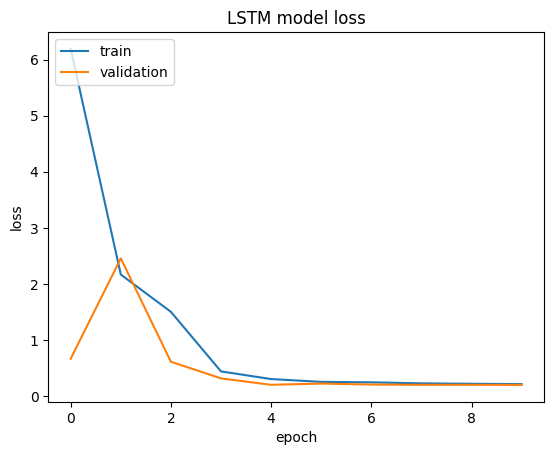

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/LSTM_tech_1993.csv",index=True, header=True )

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/LSTM_tech_1993_false.csv",index=True, header=True )

#GRU with Technical Data

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1024))
# The output layer
regressorGRU.add(Dense(units=512))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/GRU_Techincal_1993.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')


CPU times: user 1.66 s, sys: 3.1 ms, total: 1.67 s
Wall time: 1.65 s


In [ ]:

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=False, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

##Shuffle = True

In [ ]:
# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
26/27 [===========================>..] - ETA: 0s - loss: 681.9472
Epoch 1: val_loss improved from inf to 253.81470, saving model to /content/drive/My Drive/FYP Data/model/GRU_Techincal_1993.h5
27/27 [==============================] - 13s 308ms/step - loss: 679.8546 - val_loss: 253.8147 - lr: 0.0100
Epoch 2/10
26/27 [===========================>..] - ETA: 0s - loss: 106.5166
Epoch 2: val_loss improved from 253.81470 to 10.52738, saving model to /content/drive/My Drive/FYP Data/model/GRU_Techincal_1993.h5
27/27 [==============================] - 2s 57ms/step - loss: 106.3198 - val_loss: 10.5274 - lr: 0.0100
Epoch 3/10
25/27 [==========================>...] - ETA: 0s - loss: 9.1607 
Epoch 3: val_loss improved from 10.52738 to 0.65262, saving model to /content/drive/My Drive/FYP Data/model/GRU_Techincal_1993.h5
27/27 [==============================] - 2s 70ms/step - loss: 8.8845 - val_loss: 0.6526 - lr: 0.0100
Epoch 4/10
25/27 [==========================>...] - ETA: 0s - loss: 1

In [ ]:
regressorGRU = keras.models.load_model('/content/drive/My Drive/FYP Data/model/GRU_Techincal_1993.h5')
#Model Evaluation
predictions = regressorGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 1000ms/step


0.022501334541632483

In [ ]:
#profit test
test_period = time[n_past+training_point:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
stock_selection

[['INCY',
  'APA',
  'MGM',
  'CHRW',
  'STX',
  'CCI',
  'STE',
  'EA',
  'CAT',
  'PSA',
  'BKR',
  'IRM',
  'GLW',
  'MNST',
  'BAX',
  'WDC',
  'GPN',
  'CTSH',
  'HIG',
  'LRCX',
  'UNH',
  'TYL',
  'NTAP',
  'ADSK',
  'FCX',
  'PHM',
  'HUM',
  'SWKS',
  'REGN',
  'DHI'],
 ['INCY',
  'APA',
  'MGM',
  'CHRW',
  'STX',
  'CCI',
  'STE',
  'EA',
  'CAT',
  'PSA',
  'BKR',
  'IRM',
  'GLW',
  'MNST',
  'BAX',
  'WDC',
  'GPN',
  'CTSH',
  'HIG',
  'LRCX',
  'UNH',
  'TYL',
  'NTAP',
  'ADSK',
  'FCX',
  'PHM',
  'HUM',
  'SWKS',
  'REGN',
  'DHI'],
 ['INCY',
  'APA',
  'MGM',
  'CHRW',
  'STX',
  'CCI',
  'STE',
  'EA',
  'CAT',
  'PSA',
  'BKR',
  'IRM',
  'GLW',
  'MNST',
  'BAX',
  'WDC',
  'GPN',
  'CTSH',
  'HIG',
  'LRCX',
  'UNH',
  'TYL',
  'NTAP',
  'ADSK',
  'FCX',
  'PHM',
  'HUM',
  'SWKS',
  'REGN',
  'DHI'],
 ['INCY',
  'APA',
  'MGM',
  'CHRW',
  'STX',
  'CCI',
  'STE',
  'EA',
  'CAT',
  'PSA',
  'BKR',
  'IRM',
  'GLW',
  'MNST',
  'BAX',
  'WDC',
  'GPN',
  'CTSH'

In [ ]:
stock_data = pd.read_csv(("drive/My Drive/FYP Data/price.csv"),index_col = 0,header = [0,1])

i = 0
total_return = 0
for stock_list in stock_selection:
  if i == 0:
    i = i + 1
    continue
  
  for stock in stock_list:
    mer = (stock_data[stock]["Close"][test_period[i]] - stock_data[stock]["Close"][test_period[i-1]])/stock_data[stock]["Close"][test_period[i-1]]
    #print(mer)
    total_return = total_return + mer
  i = i + 1

total_return

3.8894384637318278

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by GRU with only Technical data is ',trading)
print('The money earned by GRU with only Technical data is %',trading*100/original_money)
print('The money earned by GRU with only Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by GRU with only Technical data is  220.50999546051025
The money earned by GRU with only Technical data is % 4.856304966936057
The money earned by GRU with only Technical data is %(unchange) 4.856304966936057


dict_keys(['loss', 'val_loss', 'lr'])


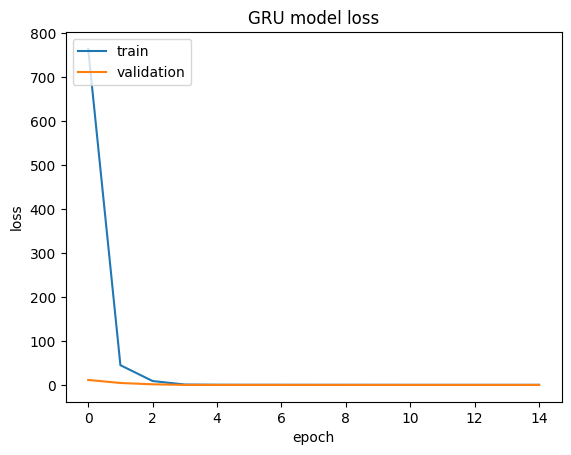

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/GRU_tech_1993.csv",index=True, header=True )

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/GRU_tech_1993_true.csv",index=True, header=True )

#Add fundamental data

In [ ]:
ticker = "GWW"
api_key = "128c9cc9f6d57cb1f0c5503f2e1e69be"

In [ ]:
key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
key_metrics_quarterly= key_metrics_quarterly.T
key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
fundamental = key_metrics_quarterly_new.tail(-2)
fundamental = fundamental.reset_index(drop=True)
fundamental = fundamental.reindex(range(360)).fillna(0)
fundamental = fundamental.reindex(index=fundamental.index[::-1])
fundamental.index = label_df.index
fundamental

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,75.235294,7.274510,4.901961,2.823529,5.137255,43.156863,36.549020,43.156863,52.901961,2.317593e+10,...,1046000000,1959500000,49.233776,39.590985,74.749583,1.828013,2.273245,1.204020,0.168560,-2.078431
2022-09-30,77.598425,8.385827,7.480315,6.594488,6.200787,45.433071,38.917323,45.433071,53.287402,2.485085e+10,...,1046000000,2030500000,49.269406,38.555510,76.925299,1.826691,2.334297,1.169966,0.184575,-0.885827
2022-10-31,77.598425,8.385827,7.480315,6.594488,6.200787,45.433071,38.917323,45.433071,53.287402,2.485085e+10,...,1046000000,2030500000,49.269406,38.555510,76.925299,1.826691,2.334297,1.169966,0.184575,-0.885827


#Get Fundamental list

In [ ]:
#read data
multi_factor = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
multi_factor = multi_factor.reindex(index=multi_factor.index[::-1])
multi_factor.reset_index()
multi_factor = multi_factor.drop(index='2023-01-31')
multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)


for ticker in tqdm(SP500_ticker):
  if ticker in ['BRK.B','BF.B','GEHC']:
    continue
  key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
  key_metrics_quarterly= key_metrics_quarterly.T
  #key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
  key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
  key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
  fundamental = key_metrics_quarterly_new.tail(-2)
  fundamental = fundamental.reset_index(drop=True)
  fundamental = fundamental.reindex(range(360)).fillna(0)
  fundamental = fundamental.reindex(index=fundamental.index[::-1])
  fundamental.index = label_df.index
  for fu in fundamental_list:
    multi_factor[ticker, fu] = fundamental[fu]
'''
multi_factor_data = multi_factor_data.drop('BRK.B', axis=1)
multi_factor_data = multi_factor_data.drop('BF.B', axis=1)
multi_factor_data = multi_factor_data.drop('GEHC', axis=1)
'''

multi_factor.to_csv("drive/My Drive/FYP Data/multi_factor_data_improved.csv",index=True, header=True )


<ipython-input-181-0f688efab153>:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)


  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-181-0f688efab153>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  multi_factor[ticker, fu] = fundamental[fu]
<ipython-input-181-0f688efab153>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  multi_factor[ticker, fu] = fundamental[fu]
<ipython-input-181-0f688efab153>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

#Training

In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor_data_improved.csv",index_col = 0,header = [0,1])
multi_factor_data

FOXA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
1993-01-29        NaN        NaN        NaN        NaN        NaN        NaN   
1993-02-26        NaN        NaN        NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN        NaN   
1993-05-28        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-31  34.400002  34.689999  34.160000  34.180000  33.940510  2479900.0   
2022-09-30  30.719999  31.360001  30.549999  30.680000  30.465034  3276000.0   
2022-10-31  28.840000  29.000000  28.469999  28.870001  28.667717  3363700.0   
2022-11-30  31.629999  32.465000  31.250000  32.450001  32.222633  4222200.0   
2022-12-30  30.299999  30.459999  29.920000  30.370001  30.157207  2620900.0   

                   ZTS                                      ...             \
                  Open        High         Low       Close  ...    peRatio   
Date                                                        ...              
1993-01-29         NaN         NaN         NaN         NaN  ...   0.000000   
1993-02-26         NaN         NaN         NaN         NaN  ...   0.000000   
1993-03-31         NaN         NaN         NaN         NaN  ...   0.000000   
1993-04-30         NaN         NaN         NaN         NaN  ...   0.000000   
1993-05-28         NaN         NaN         NaN         NaN  ...   0.000000   
...                ...         ...         ...         ...  ...        ...   
2022-08-31  158.160004  159.410004  156.210007  156.529999  ...  38.179726   
2022-09-30  150.419998  152.029999  148.039993  148.289993  ...  32.783583   
2022-10-31  152.110001  153.339996  149.839996  150.779999  ...  32.783583   
2022-11-30  148.089996  154.179993  146.910004  154.139999  ...  32.783583   
2022-12-30  147.199997  147.789993  144.740005  146.550003  ...  37.264629   

                                                                       \
              pbRatio  evToSales receivablesTurnover payablesTurnover   
Date                                                                    
1993-01-29   0.000000   0.000000            0.000000         0.000000   
1993-02-26   0.000000   0.000000            0.000000         0.000000   
1993-03-31   0.000000   0.000000            0.000000         0.000000   
1993-04-30   0.000000   0.000000            0.000000         0.000000   
1993-05-28   0.000000   0.000000            0.000000         0.000000   
...               ...        ...                 ...              ...   
2022-08-31  17.639367  41.361745            1.589466         1.453488   
2022-09-30  14.876702  36.771260            1.683768         1.627346   
2022-10-31  14.876702  36.771260            1.683768         1.627346   
2022-11-30  14.876702  36.771260            1.683768         1.627346   
2022-12-30  15.599541  35.232831            1.679012         1.612346   

                                                                     \
           debtToAssets inventoryTurnover       roe revenuePerShare   
Date                                                                  
1993-01-29     0.000000          0.000000  0.000000        0.000000   
1993-02-26     0.000000          0.000000  0.000000        0.000000   
1993-03-31     0.000000          0.000000  0.000000        0.000000   
1993-04-30     0.000000          0.000000  0.000000        0.000000   
1993-05-28     0.000000          0.000000  0.000000        0.000000   
...                 ...               ...       ...             ...   
2022-08-31     0.667393          0.283447  0.115502        4.365957   
2022-09-30     0.659061          0.263569  0.113446        4.279607   

In [ ]:
multi_factor_data[np.isnan(multi_factor_data)] = 0
#get time list

time = multi_factor_data.index.values
time

array(['1993-01-29', '1993-02-26', '1993-03-31', '1993-04-30',
       '1993-05-28', '1993-06-30', '1993-07-30', '1993-08-31',
       '1993-09-30', '1993-10-29', '1993-11-30', '1993-12-31',
       '1994-01-31', '1994-02-28', '1994-03-31', '1994-04-29',
       '1994-05-31', '1994-06-30', '1994-07-29', '1994-08-31',
       '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-30',
       '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-28',
       '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
       '1995-09-29', '1995-10-31', '1995-11-30', '1995-12-29',
       '1996-01-31', '1996-02-29', '1996-03-29', '1996-04-30',
       '1996-05-31', '1996-06-28', '1996-07-31', '1996-08-30',
       '1996-09-30', '1996-10-31', '1996-11-29', '1996-12-31',
       '1997-01-31', '1997-02-28', '1997-03-31', '1997-04-30',
       '1997-05-30', '1997-06-30', '1997-07-31', '1997-08-29',
       '1997-09-30', '1997-10-31', '1997-11-28', '1997-12-31',
       '1998-01-30', '1998-02-27', '1998-03-31', '1998-

In [ ]:
label_df = pd.read_csv("drive/My Drive/FYP Data/label.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1993-02-26,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1993-03-31,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-04-30,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-05-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,1
2022-09-30,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2022-10-31,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
# get multifactor list
multifactor_list = Technical_list+fundamental_list

# get x_dataset, y_dataset
multi_factor_data = multi_factor_data.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  y_dataset.append(label_df[ticker])
  #print(ticker)
  for factor in multifactor_list:
    x_dataset.append(multi_factor_data[ticker, factor])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)

  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (360, 500)
x_dataset (360, 10000)


In [ ]:
n_future = 1   # Number of month we want top predict into the future
n_past = 9  

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

(360, 10000)

In [ ]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(351, 9, 10000)
(351, 500)


In [ ]:
training_point = 327

In [ ]:
#Preparation of test set

x_train = X[0:training_point]
y_train = Y[0:training_point]

x_test = X[training_point:]
y_test = Y[training_point:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(327, 9, 10000)
(327, 500)
(24, 9, 10000)
(24, 500)


##LSTM

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=False, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 9.0198
Epoch 1: val_loss improved from inf to 0.23018, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993.h5
27/27 [==============================] - 10s 281ms/step - loss: 9.0198 - val_loss: 0.2302 - lr: 0.0100
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.3964
Epoch 2: val_loss improved from 0.23018 to 0.20101, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993.h5
27/27 [==============================] - 4s 134ms/step - loss: 0.3964 - val_loss: 0.2010 - lr: 0.0100
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.2407
Epoch 3: val_loss improved from 0.20101 to 0.19746, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993.h5
27/27 [==============================] - 3s 117ms/step - loss: 0.2407 - val_loss: 0.1975 - lr: 0.0100
Epoch 4/10
27/27 [==============================] - ETA: 0s - loss: 0.

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+training_point:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

1/1 [==============================] - 1s 637ms/step
rmse 0.022343429662287237


In [ ]:
stock_selection

[['NFLX',
  'RCL',
  'EOG',
  'REGN',
  'DVN',
  'TTWO',
  'TRMB',
  'MNST',
  'APA',
  'ROK',
  'TSN',
  'MOS',
  'SWKS',
  'DISH',
  'PHM',
  'VRSN',
  'TYL',
  'VLO',
  'COF',
  'RMD',
  'JNPR',
  'ALK',
  'AMZN',
  'CTSH',
  'FCX',
  'URI',
  'ILMN',
  'INCY',
  'BIIB',
  'AAPL'],
 ['NFLX',
  'RCL',
  'EOG',
  'REGN',
  'DVN',
  'TTWO',
  'TRMB',
  'MNST',
  'APA',
  'ROK',
  'TSN',
  'MOS',
  'SWKS',
  'DISH',
  'PHM',
  'VRSN',
  'TYL',
  'VLO',
  'COF',
  'RMD',
  'JNPR',
  'ALK',
  'AMZN',
  'CTSH',
  'FCX',
  'URI',
  'ILMN',
  'INCY',
  'BIIB',
  'AAPL'],
 ['NFLX',
  'RCL',
  'EOG',
  'REGN',
  'DVN',
  'TTWO',
  'TRMB',
  'MNST',
  'APA',
  'ROK',
  'TSN',
  'MOS',
  'SWKS',
  'DISH',
  'PHM',
  'VRSN',
  'TYL',
  'VLO',
  'COF',
  'RMD',
  'JNPR',
  'ALK',
  'AMZN',
  'CTSH',
  'FCX',
  'URI',
  'ILMN',
  'INCY',
  'BIIB',
  'AAPL'],
 ['NFLX',
  'RCL',
  'EOG',
  'REGN',
  'DVN',
  'TTWO',
  'TRMB',
  'MNST',
  'APA',
  'ROK',
  'TSN',
  'MOS',
  'SWKS',
  'DISH',
  'PHM',


In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  -286.5499954223633
The money earned by LSTM with Fundamental and Technical data is % -6.277679007890828
The money earned by LSTM with Fundamental and Technical data is %(unchange) -6.277679007890828


In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/LSTM_w_fundamental_1993.csv",index=True, header=True )

###Shuffle = True

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993_1.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 12.1221
Epoch 1: val_loss improved from inf to 6.98072, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993_1.h5
27/27 [==============================] - 6s 135ms/step - loss: 12.1221 - val_loss: 6.9807 - lr: 0.0100
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 3.2203
Epoch 2: val_loss improved from 6.98072 to 0.31042, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993_1.h5
27/27 [==============================] - 3s 123ms/step - loss: 3.2203 - val_loss: 0.3104 - lr: 0.0100
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.3991
Epoch 3: val_loss improved from 0.31042 to 0.21684, saving model to /content/drive/My Drive/FYP Data/model/LSTM_w_fundamental_1993_1.h5
27/27 [==============================] - 3s 119ms/step - loss: 0.3991 - val_loss: 0.2168 - lr: 0.0100
Epoch 4/10
26/27 [===========================>..] - ETA: 0s - l

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+325:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

1/1 [==============================] - 1s 646ms/step
rmse 0.010926844180872043
The money earned by LSTM with Fundamental and Technical data is  1955.9558715820312
The money earned by LSTM with Fundamental and Technical data is % 25.424892748209256
The money earned by LSTM with Fundamental and Technical data is %(unchange) 25.424892748209256


In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/LSTM_w_fundamental_1993_1.csv",index=True, header=True )

##GRU

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/GRU_fundamental_1993.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')


CPU times: user 1.79 s, sys: 446 µs, total: 1.79 s
Wall time: 1.82 s


In [ ]:
# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=False, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

##Shuffle == True

In [ ]:
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=10, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/10
25/27 [==========================>...] - ETA: 0s - loss: 0.7250
Epoch 1: val_loss improved from inf to 0.35653, saving model to /content/drive/My Drive/FYP Data/model/GRU_fundamental_1993.h5
27/27 [==============================] - 18s 498ms/step - loss: 0.7114 - val_loss: 0.3565 - lr: 0.0100
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.3837
Epoch 2: val_loss improved from 0.35653 to 0.33560, saving model to /content/drive/My Drive/FYP Data/model/GRU_fundamental_1993.h5
27/27 [==============================] - 3s 95ms/step - loss: 0.3837 - val_loss: 0.3356 - lr: 0.0100
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.3648
Epoch 3: val_loss improved from 0.33560 to 0.29831, saving model to /content/drive/My Drive/FYP Data/model/GRU_fundamental_1993.h5
27/27 [==============================] - 2s 84ms/step - loss: 0.3648 - val_loss: 0.2983 - lr: 0.0100
Epoch 4/10
25/27 [==========================>...] - ETA: 0s - loss: 0.3386
Epoch 

In [ ]:
#Model Evaluation
predictions = regressorGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+325:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

1/1 [==============================] - 1s 958ms/step
rmse 0.06470179085262741


In [ ]:
stock_selection

[['EXC',
  'TECH',
  'JBHT',
  'CMA',
  'PHM',
  'CCL',
  'MOS',
  'EQIX',
  'MCO',
  'DVA',
  'BKR',
  'ATO',
  'MDT',
  'DRI',
  'CAT',
  'CTAS',
  'ACN',
  'COO',
  'CTRA',
  'EOG',
  'IT',
  'WDC',
  'RJF',
  'MRO',
  'AXP',
  'VLO',
  'NI',
  'APA',
  'COP',
  'MHK'],
 ['EXC',
  'TECH',
  'JBHT',
  'CMA',
  'PHM',
  'CCL',
  'MOS',
  'EQIX',
  'MCO',
  'DVA',
  'BKR',
  'ATO',
  'MDT',
  'DRI',
  'CAT',
  'CTAS',
  'ACN',
  'COO',
  'CTRA',
  'EOG',
  'IT',
  'WDC',
  'RJF',
  'MRO',
  'AXP',
  'VLO',
  'NI',
  'APA',
  'COP',
  'MHK'],
 ['EXC',
  'TECH',
  'JBHT',
  'CMA',
  'PHM',
  'CCL',
  'MOS',
  'EQIX',
  'MCO',
  'DVA',
  'BKR',
  'ATO',
  'MDT',
  'DRI',
  'CAT',
  'CTAS',
  'ACN',
  'COO',
  'CTRA',
  'EOG',
  'IT',
  'WDC',
  'RJF',
  'MRO',
  'AXP',
  'VLO',
  'NI',
  'APA',
  'COP',
  'MHK'],
 ['EXC',
  'TECH',
  'JBHT',
  'CMA',
  'PHM',
  'CCL',
  'MOS',
  'EQIX',
  'MCO',
  'DVA',
  'BKR',
  'ATO',
  'MDT',
  'DRI',
  'CAT',
  'CTAS',
  'ACN',
  'COO',
  'CTRA',
  

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  360.59047985076904
The money earned by LSTM with Fundamental and Technical data is % 9.54470936243052
The money earned by LSTM with Fundamental and Technical data is %(unchange) 9.54470936243052


In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/GRU_fundamental_1993.csv",index=True, header=True )

In [ ]:
df_stock_selection = pd.DataFrame (stock_selection)
df_stock_selection.to_csv("drive/My Drive/FYP Data/stock result/GRU_fundamental_1993_true.csv",index=True, header=True )

#original one with all fundamental data

In [ ]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table[0]
SP500_ticker = data_table[0]['Symbol'].tolist()

#remove invalid stock ticker
SP500_ticker.remove('BRK.B')
SP500_ticker.remove('BF.B')
SP500_ticker.remove('GEHC')
SP500_ticker.remove('BG')
SP500_ticker.remove('FICO')
SP500_ticker.remove('PODD')

In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor.csv",index_col = 0,header = [0,1])

for ticker in tqdm(SP500_ticker):
  if ticker in ['BRK.B','BF.B','GEHC']:
    continue
  key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
  key_metrics_quarterly= key_metrics_quarterly.T
  #key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
  key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
  key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
  fundamental = key_metrics_quarterly_new.tail(-2)
  fundamental = fundamental.reset_index(drop=True)
  fundamental = fundamental.reindex(range(360)).fillna(0)
  fundamental = fundamental.reindex(index=fundamental.index[::-1])
  fundamental.index = label_df.index
  for fu in fundamental_list:
    multi_factor_data[ticker, fu] = fundamental[fu]

multi_factor_data = multi_factor_data.drop('BRK.B', axis=1)
multi_factor_data = multi_factor_data.drop('BF.B', axis=1)
multi_factor_data = multi_factor_data.drop('GEHC', axis=1)

multi_factor_data.to_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index=True, header=True )


  0%|          | 0/500 [00:00<?, ?it/s]

NameError: ignored

In [ ]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index_col = 0,header = [0,1])
multi_factor_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
1993-02-26 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-03-31 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-04-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-05-28 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-06-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
...                              ...        ...        ...        ...   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
1993-02-26 00:00:00-05:00   0.000000        0.0    5.375000    5.375000   
1993-03-31 00:00:00-05:00   0.000000        0.0    4.750000    4.875000   
1993-04-30 00:00:00-04:00   0.000000        0.0    5.000000    5.125000   
1993-05-28 00:00:00-04:00   0.000000        0.0    5.312500    5.312500   
1993-06-30 00:00:00-04:00   0.000000        0.0    5.125000    5.125000   
...                              ...        ...         ...         ...   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   

                                                   ...             ZTS  \
                                  Low       Close  ... averagePayables   
Date                                               ...                   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...             NaN   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...             NaN   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...             NaN   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...             NaN   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...             NaN   
...                               ...         ...  ...             ...   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...             NaN   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...             NaN   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...             NaN   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...             NaN   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...             NaN   

                                                                 \
                          averageInventory daysSalesOutstanding   
Date                                                              
1993-02-26 00:00:00-05:00              NaN                  NaN   
1993-03-31 00:00:00-05:00              NaN                  NaN   
1993-04-30 00:00:00-04:00              NaN                  NaN   
1993-05-28 00:00:00-04:00              NaN                  NaN   
1993-06-30 00:00:00-04:00              NaN                  NaN   
...                                    ...                  ...   
2022-08-31 00:00:00-04:00              NaN                  NaN   
2022-09-30 00:00:00-04:00              NaN                  NaN   
2022-10-31 00:00:00-04:00              NaN                  NaN   
2022-11-30 00:00:00-05:00              NaN                  NaN   
2022-12-30 00:00:00-05:00              NaN        

In [ ]:
fundamental_list = fundamental.columns.to_list()
fundamental_list

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

In [ ]:
multi_factor_data[np.isnan(multi_factor_data)] = 0

In [ ]:
# get multifactor list
multifactor_list = Technical_list+fundamental_list

# get x_dataset, y_dataset
multi_factor_data = multi_factor_data.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  
  y_dataset.append(label_df[ticker])
  #print(ticker)
  for factor in multifactor_list:
    x_dataset.append(multi_factor_data[ticker, factor])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)

  0%|          | 0/497 [00:00<?, ?it/s]

y_dataset (360, 497)
x_dataset (359, 32802)


# LSTM

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/model/LSTM_fundamental_1993_origin.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
25/26 [===========================>..] - ETA: 0s - loss: 7.6780
Epoch 1: val_loss improved from inf to 0.77165, saving model to weights_w_fundamental.h5
26/26 [==============================] - 4s 61ms/step - loss: 7.4343 - val_loss: 0.7717 - lr: 0.0100
Epoch 2/15
25/26 [===========================>..] - ETA: 0s - loss: 0.6223
Epoch 2: val_loss improved from 0.77165 to 0.24311, saving model to weights_w_fundamental.h5
26/26 [==============================] - 1s 36ms/step - loss: 0.6131 - val_loss: 0.2431 - lr: 0.0100
Epoch 3/15
25/26 [===========================>..] - ETA: 0s - loss: 0.3298
Epoch 3: val_loss improved from 0.24311 to 0.22274, saving model to weights_w_fundamental.h5
26/26 [==============================] - 1s 33ms/step - loss: 0.3293 - val_loss: 0.2227 - lr: 0.0100
Epoch 4/15
25/26 [===========================>..] - ETA: 0s - loss: 0.2984
Epoch 4: val_loss improved from 0.22274 to 0.21244, saving model to weights_w_fundamental.h5
26/26 [======================

dict_keys(['loss', 'val_loss', 'lr'])


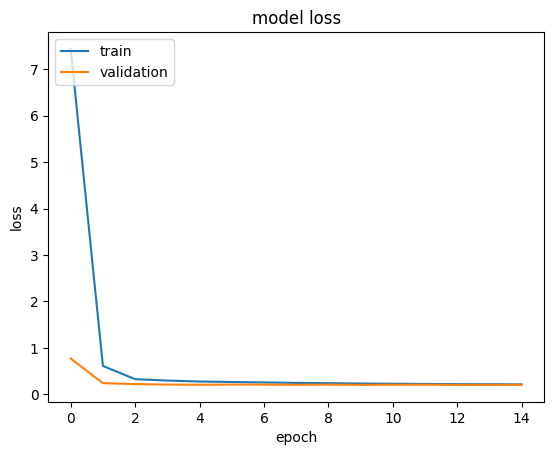

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('rmse', rmse)

#profit test
test_period = time[n_past+325:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

1/1 [==============================] - 0s 27ms/step


0.009829873807871571

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  -30.203195571899414
The money earned by LSTM with Fundamental and Technical data is % -0.4763363847814673
The money earned by LSTM with Fundamental and Technical data is %(unchange) -0.4763363847814673


In [ ]:
stock_selection

[['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',
  'CI',
  'VFC',
  'ODFL',
  'MCO',
  'CTSH',
  'JBHT',
  'ROST',
  'CPRT',
  'WYNN',
  'MTCH',
  'MNST',
  'VTR',
  'AMT',
  'CTRA',
  'TYL'],
 ['BWA',
  'EMN',
  'UNH',
  'URI',
  'TXT',
  'FMC',
  'EIX',
  'AMZN',
  'BBWI',
  'BKNG',
  'ARE',
  'ADBE',
  'CSGP',
  'FFIV',
  'SWKS',


# GRU

In [ ]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/FYP Data/weights_GRU.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
24/26 [==========================>...] - ETA: 0s - loss: 0.8176
Epoch 1: val_loss improved from inf to 0.26238, saving model to weights_GRU.h5
26/26 [==============================] - 6s 68ms/step - loss: 0.7818 - val_loss: 0.2624 - lr: 0.0100
Epoch 2/15
25/26 [===========================>..] - ETA: 0s - loss: 0.3403
Epoch 2: val_loss improved from 0.26238 to 0.25451, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3398 - val_loss: 0.2545 - lr: 0.0100
Epoch 3/15
26/26 [==============================] - ETA: 0s - loss: 0.3233
Epoch 3: val_loss improved from 0.25451 to 0.25248, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3233 - val_loss: 0.2525 - lr: 0.0100
Epoch 4/15
24/26 [==========================>...] - ETA: 0s - loss: 0.3050
Epoch 4: val_loss improved from 0.25248 to 0.24879, saving model to weights_GRU.h5
26/26 [==============================] - 1s 30ms/step - loss: 0.3037 

In [ ]:
#Model Evaluation
predictions = regressorGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 1s/step


0.006409621638962282

In [ ]:
#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-30:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

In [ ]:
#trading simulate
original_money = 0
trading = 0
for stock in stock_selection[0]:
  original_money = original_money + stock_data[stock]["Close"][test_period[0]]
  #print(stock_data[stock]["Close"][test_period[0]])


trading = - original_money
i = 0

for stock_list in stock_selection:
  if i==0 or 25:
    i = i + 1
    continue

  for stock in stock_list:
    trading = trading + stock_data[stock]["Close"][test_period[i-1]] - stock_data[stock]["Close"][test_period[i]]
    #print(trading)
  
  i = i + 1

end_money = 0

for stock in stock_selection[-1]:
  trading = trading + stock_data[stock]["Close"][test_period[-1]]
  end_money = end_money + stock_data[stock]["Close"][test_period[-1]]
  #print(stock_data[stock]["Close"][test_period[-1]])

print('The money earned by LSTM with Fundamental and Technical data is ',trading)
print('The money earned by LSTM with Fundamental and Technical data is %',trading*100/original_money)
print('The money earned by LSTM with Fundamental and Technical data is %(unchange)',(end_money-original_money)*100/original_money)

The money earned by LSTM with Fundamental and Technical data is  301.037314414978
The money earned by LSTM with Fundamental and Technical data is % 8.04436665883254
The money earned by LSTM with Fundamental and Technical data is %(unchange) 8.04436665883254


dict_keys(['loss', 'val_loss', 'lr'])


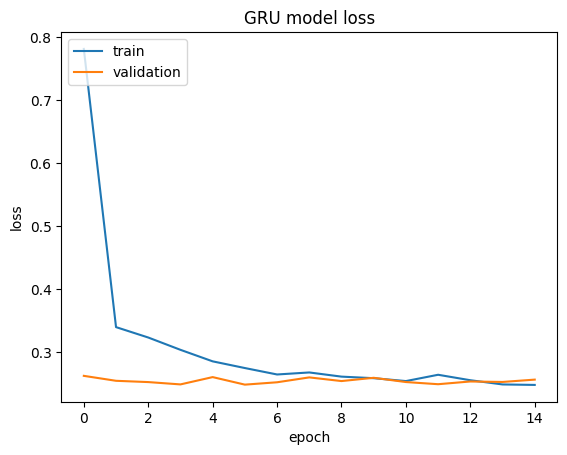

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()